<a href="https://colab.research.google.com/github/lab-pep-itba/Intro-Probabilidad/blob/master/Naive_Bayes_con_histograma_por_clase_por_pixel_en_im%C3%A1genes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
! wget https://github.com/lab-pep-itba/Intro-Probabilidad/raw/master/sandalias.npy
! wget https://github.com/lab-pep-itba/Intro-Probabilidad/raw/master/buzos.npy

--2020-04-14 02:25:27--  https://github.com/lab-pep-itba/Intro-Probabilidad/raw/master/sandalias.npy
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/lab-pep-itba/Intro-Probabilidad/master/sandalias.npy [following]
--2020-04-14 02:25:28--  https://raw.githubusercontent.com/lab-pep-itba/Intro-Probabilidad/master/sandalias.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4704080 (4.5M) [application/octet-stream]
Saving to: ‘sandalias.npy.1’

sandalias.npy.1     100%[===================>]   4.49M  --.-KB/s    in 0.1s    

2020-04-14 02:25:28 (44.5 MB/s) - ‘sandalias.npy.1’ saved [4704080/4704080]

--2

In [17]:
! wget https://raw.githubusercontent.com/lab-pep-itba/Intro-Probabilidad/master/HistogramBasedNaiveBayes.py

--2020-04-14 02:28:31--  https://raw.githubusercontent.com/lab-pep-itba/Intro-Probabilidad/master/HistogramBasedNaiveBayes.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3678 (3.6K) [text/plain]
Saving to: ‘HistogramBasedNaiveBayes.py’

HistogramBasedNaive 100%[===================>]   3.59K  --.-KB/s    in 0s      

2020-04-14 02:28:32 (76.1 MB/s) - ‘HistogramBasedNaiveBayes.py’ saved [3678/3678]



In [0]:
import numpy as np
from matplotlib import pyplot as plt

In [0]:
# Cargo imágenes
buzos = np.load('buzos.npy')
sandalias = np.load('sandalias.npy')

In [0]:
from HistogramBasedNaiveBayes import HistogramBasedNaiveBayes as HistogramBasedNaiveBayes

In [0]:
niveles = 256
pixeles = list(range(niveles))
total_pixeles = sandalias.shape[0]*sandalias.shape[1]*sandalias.shape[2]

In [0]:
hist_sandalias = []
for pixel in pixeles:
    # notar sandalias == pixel
    prob_sand_pixel = (sandalias == pixel).sum() / total_pixeles
    hist_sandalias.append(prob_sand_pixel)

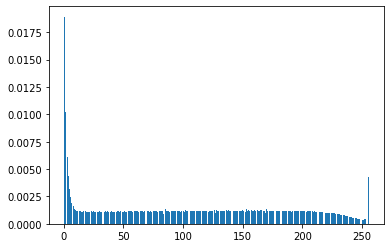

In [0]:
# Sacamos el cero por claridad
plt.bar(pixeles[1:], hist_sandalias[1:])
plt.show()

In [0]:
hist_buzos = []
for pixel in pixeles:
    prob_buzos_pixel = (buzos == pixel).sum() / total_pixeles
    hist_buzos.append(prob_buzos_pixel)

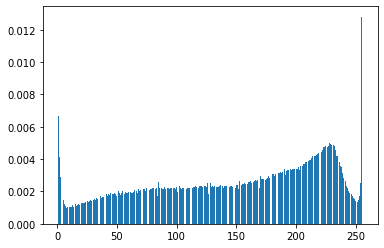

In [0]:
# Sacamos el cero por claridad
plt.bar(pixeles[1:], hist_buzos[1:])
plt.show()

In [0]:
def es_sandalia(imagen, hist_sandalias, hist_buzos, prior_sand=0.5,  prior_buz=0.5):
    # devuelve true si es sandalia, false si es buzo
    log_sand = np.log(np.array(hist_sandalias)[imagen.reshape(-1)]).sum() 
    + np.log(prior_sand)
    log_buz = np.log(np.array(hist_buzos)[imagen.reshape(-1)]).sum() 
    + np.log(prior_buz)
    return log_sand>log_buz

In [0]:
n_correct_buzos = 0
for buzo in buzos:
    n_correct_buzos+= not es_sandalia(buzo, hist_sandalias, hist_buzos)
acc_buz = n_correct_buzos/len(buzos)

In [0]:
n_correct_sand = 0
for sand in sandalias:
    n_correct_sand+=  es_sandalia(sand, hist_sandalias, hist_buzos)
acc_sand = n_correct_sand/len(sandalias)

In [0]:
acc = (n_correct_buzos+n_correct_sand)/(len(sandalias)+len(buzos))

In [0]:
print(f'Accuracy: {acc}')
print(f'Accuracy Sandalias: {acc_sand}')
print(f'Accuracy Buzos: {acc_buz}')

Accuracy: 0.9556666666666667
Accuracy Sandalias: 0.9576666666666667
Accuracy Buzos: 0.9536666666666667
